# The incremental proximal method

In this simple notebook, we will look at the incremental proximal method and implement it for a simple linear regression model.

We are interested in minimizing a function $f(\theta)$ and obtaining the solution,

\begin{align*}
\theta^* = \arg\min_{\theta \in \mathbb{R}^d} f(\theta).
\end{align*}

For this particular problem, we will assume that we have a cost function of form,

\begin{align*}
f(\theta) = \frac{1}{n} \sum_{k=1}^n f_k(\theta).
\end{align*}

This happens when the cost function is separable with respect to the data points, a common feature of state-of-the-art machine learning problems.

Incremental proximal method, in its simplest form, has the following iteration structure:

\begin{align*}
\theta_k = \arg \min_\theta f_k(\theta) + \lambda \|\theta - \theta_{k-1}\|_2^2.
\end{align*}

Of course, this problem is not always tractable for generic $f_k$. In this note, we just put,

\begin{align*}
f_k(\theta) = (y_k - x_k^\top \theta)^2,
\end{align*}

i.e., we just consider the linear regression problem.

Let's first generate the data that agrees with this cost function (what this means requires more explanation of the relationship between probability and optimization). We simply generate it as follows:

\begin{align*}
x_k &\sim \mathcal{N}(0,I) \\
y_k &\sim \mathcal{N}(x_k^\top \theta,\nu).
\end{align*}

Notice that in what follows we assume that $x_k$ are fixed and known (as inputs in the regression setting). The unknown $\theta$ is fixed (although I generate it uniformly random), so there is nothing Bayesian in the estimation part (well, there is, but it's complicated).

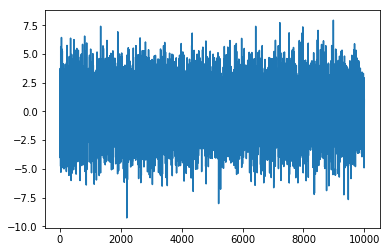

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate data from the linear model
d = 2
n = 10000
X = np.random.randn(d,n)
th = np.random.uniform(0,5,(d,1))

nu = 0.1;

y = np.transpose(X).dot(th) + np.multiply(np.sqrt(nu),np.random.randn(n,1))

plt.plot(y)
plt.show()

# how data look like

Now, we are ready to go for the implementation. Recall that the iteration we want to implement is the following,

\begin{align*}
\theta_k = \arg \min_\theta (y_k - x_k^\top \theta)^2 + \lambda \|\theta - \theta_{k-1}\|_2^2
\end{align*}

With a little bit of linear algebra, one can arrive that,

\begin{align*}
\theta_k = \theta_{k-1} + \frac{x_k (y_k - x_k^\top \theta_{k-1})}{\lambda + x_k^\top x_k}
\end{align*}

where $y_k$ is selected from the dataset randomly, the time index $k$ is artificial. Here is the code snippet for this part:

In [9]:
thest = np.random.uniform(0,30,(d,1)) # initialization of the parameter estimate
E = []
lam = 100;

for t in range(0,n):
    ind = np.random.randint(0,high=n)
    thest = np.add(thest,np.divide(np.multiply(X[:,[ind]],y[ind] - np.dot(X[:,ind],thest)), lam + np.dot(X[:,ind],X[:,ind])))
    E.append(np.linalg.norm(np.subtract(th,thest)))

In [10]:
# Let's see how close we are to the true parameter.
print(th)
print(thest)

[[ 2.15368202]
 [ 0.27405093]]
[[ 2.13030863]
 [ 0.26528591]]


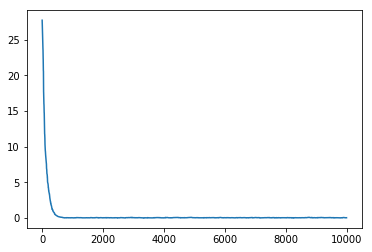

In [11]:
# Plot the error
plt.plot(E)
plt.show()